# Fourier series

Name: Takumi Mori <br>
Date: 04/23/2021

In [604]:
import pandas as pd
import numpy as np
import sympy as sym
from scipy.integrate import quad
%matplotlib inline
import matplotlib.pyplot as plt

In [605]:
sym.init_printing(False)

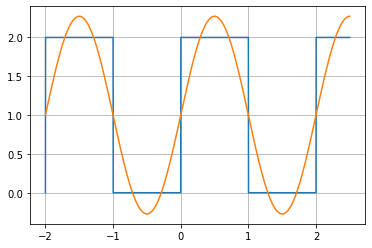

In [607]:
#Base Function
#### y = |x+2| - round(x)
base_func = np.ceil(t) - np.round(t)
T = 2
n = 1
t = np.arange(-2.0, 2.5, 0.001)
y = 2*(np.ceil(t/2) - np.round(t/2)) 
y_f = 1 + (4/np.pi*np.sin(np.pi*t))
plt.grid(True)
plt.plot(t,y)
plt.plot(t,y_f)
plt.show()

# Define Fourier 

In [620]:
#define based function
def base_func(t):
    return 2*(np.ceil(t/2) - np.round(t/2))
# define fourier transform T: Cycle, n: times
t = sym.Symbol('t')
def fourier(base_func,T,n): 
    t = sym.Symbol('t')
    a_zero = 2/T * quad(base_func,-T/2, T/2)[0] +t/t - 1 # Get the first fourier coefficients
    after_fourier = a_zero / 2 # First Fourier Seires
    for i in range(1,n): 
        # Get Fourier coefficients
        a = 2/T * quad(lambda t: base_func(t) * np.cos(2*np.pi/T*i*t),-T/2, T/2)[0]
        b = 2/T * quad(lambda t: base_func(t) * np.sin(2*np.pi/T*i*t),-T/2, T/2)[0]
        # Fourier 
        after_fourier += a*sym.cos(2*np.pi/T*i*t)+b*sym.sin(2*np.pi/T*i*t)
    return after_fourier
fourier(base_func,2,2) #test

1.27323954473516*sin(3.14159265358979*t) + 3.13379433794464e-17*cos(3.14159265358979*t) + 1.0

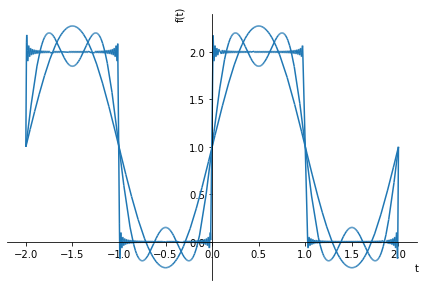

In [621]:
# Graphing
# Based function: 2*(np.ceil(t/2) - np.round(t/2)
# n = 2, 4, 100
#t = [-2,2]

p = sym.plot(fourier(base_func,2,2),fourier(base_func,2,4),fourier(base_func,2,100),(t, -2, 2),show = False)
p.show()

# Fourier Seriers in Art 

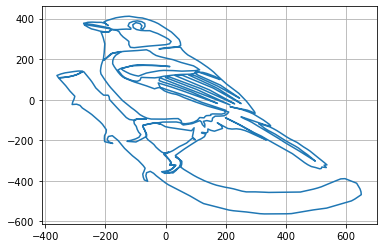

In [476]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("great-tit-drawing.txt")
xpos = data[:,0]
ypos = data[:,1]
plt.plot(xpos, ypos)
plt.grid()
plt.show()

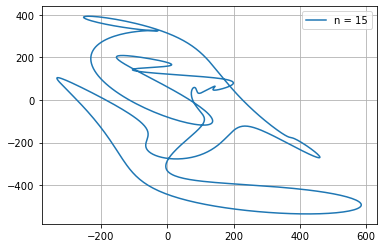

In [477]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("great-tit-drawing.txt")
xpos = data[:,0]
ypos = data[:,1]

X = np.fft.fft(xpos)
Y = np.fft.fft(ypos)

nlim=15 #The parameter

N = X.shape[0]
s = np.arange(0,N,1.0)
x = X[0] * np.cos(2*np.pi*0.0/N*s)/N
y = Y[0] * np.cos(2*np.pi*0.0/N*s)/N
for n in range(1,nlim+1):
    xan = (X[n] - X[N-n]) * (0.0 + 1.0j)
    xbn = (X[n] + X[N-n])
    yan = (Y[n] - Y[N-n]) * (0.0 + 1.0j)
    ybn = (Y[n] + Y[N-n])
    x = x + xan * np.sin(2*np.pi*n/N*s)/N + xbn * np.cos(2*np.pi*n/N*s)/N
    y = y + yan * np.sin(2*np.pi*n/N*s)/N + ybn * np.cos(2*np.pi*n/N*s)/N

plt.plot(np.real(x), np.real(y),label='n = '+str(nlim))
plt.grid()
plt.legend()
plt.show()